<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/manczak/PUM_Klasyfikacja_Binarna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Załadowanie danych

In [ ]:
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = load_breast_cancer()
y = data.target
X = data.data

liczba przypadkow

In [2]:

total_cases = len(y)

malignant_cases = sum(y == 0)

print(total_cases)
print(malignant_cases)


569
212


histogram

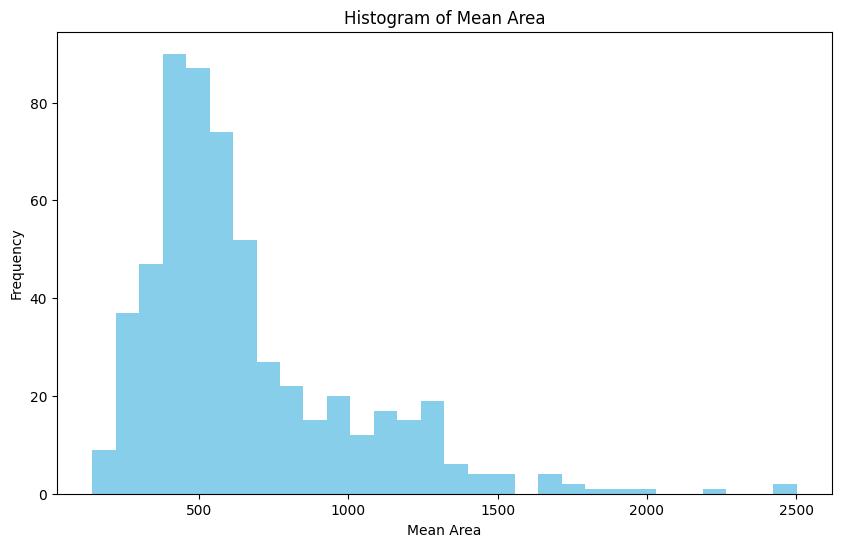

In [3]:
mean_area = X[:, data.feature_names.tolist().index('mean area')]

plt.figure(figsize=(10, 6))
plt.hist(mean_area, bins=30, color='skyblue')
plt.title('Histogram of Mean Area')
plt.xlabel('Mean Area')
plt.ylabel('Frequency')
plt.show()


dalsze działanie

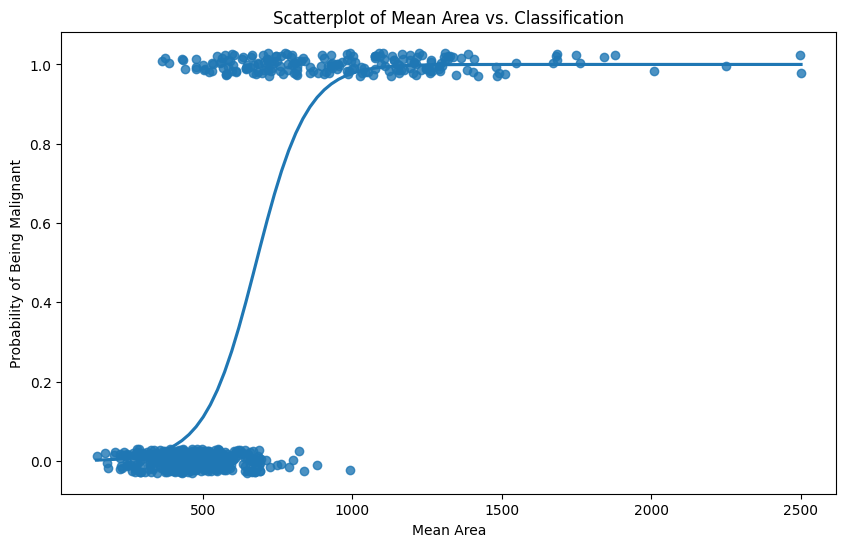

(569, 212)

In [4]:
is_malignant = y == 0

plt.figure(figsize=(10, 6))
sns.regplot(x=mean_area, y=is_malignant, logistic=True, ci=None, y_jitter=0.03)
plt.title('Scatterplot of Mean Area vs. Classification')
plt.xlabel('Mean Area')
plt.ylabel('Probability of Being Malignant')
plt.show()

(total_cases, malignant_cases)

#Logistic Regression


<Figure size 800x600 with 0 Axes>

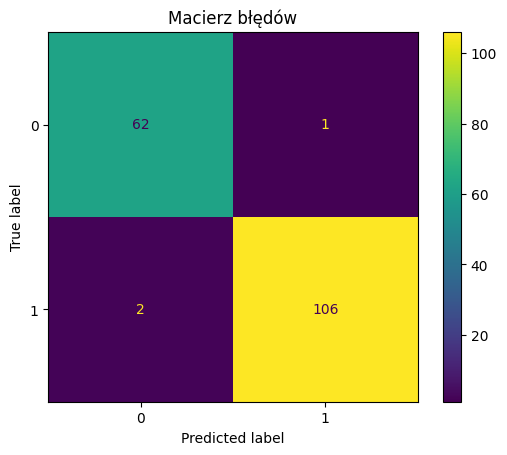

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve

# Standaryzacja
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Podzial
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=42)

# budujemy model
model = LogisticRegression()
model.fit(X_train, y_train)

# predykcja
y_pred = model.predict(X_test)

# macierz
conf_mat = confusion_matrix(y_test, y_pred)

# Wyswietlamy macierz
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Macierz błędów')
plt.show()


* 62 osoby zostaly poprawnie zdiagnozowane, że mają raka.
* 1 osoba usłyszała, że ma raka, a to nieprawda
* 2 osoby usłyszały, że są zdrowe, a to nieprawda - Błąd największej wagi!
* 106 osob, usłyszało, że są zdrowe i to była prawda

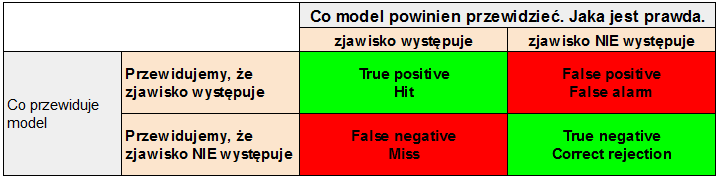

In [8]:
from sklearn.metrics import classification_report

# Generate a classification report
class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Krzywa ROC

<Figure size 800x600 with 0 Axes>

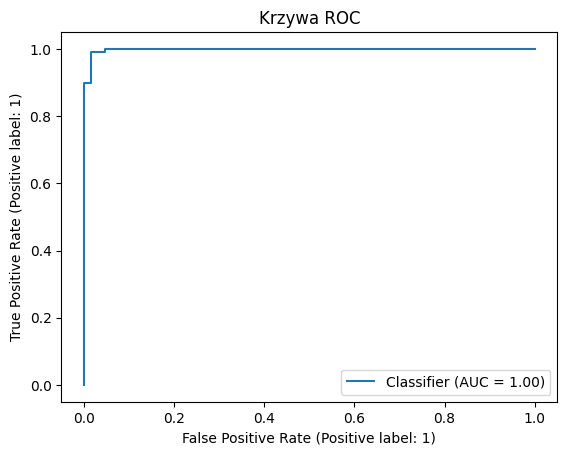

In [7]:

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test, model.predict_proba(X_test)[:, 1])
plt.title('Krzywa ROC')
plt.show()

In [10]:
# Użyj wcześniej zdefiniowanego modelu z określonym stanem losowym dla reprodukowalności
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Oblicz oszacowania prawdopodobieństwa dla zbioru testowego
y_proba = clf.predict_proba(X_test)[:, 1]

# Tutaj dostosujemy próg. Spróbujmy różnych progów, aby zobaczyć efekt.
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]  # Przykładowe progi, w tym domyślny 0.5
results = []

for threshold in thresholds:
    # Zastosuj próg do prawdopodobieństwa, aby sklasyfikować jako złośliwe
    y_pred_adjusted = (y_proba >= threshold).astype(int)

    # Oblicz macierz pomyłek i wyodrębnij fałszywe negatywy (FN) oraz prawdziwe pozytywy (TP)
    conf_mat_adjusted = confusion_matrix(y_test, y_pred_adjusted)
    FN = conf_mat_adjusted[1][0]  # Rzeczywiste pozytywy, które błędnie sklasyfikowaliśmy jako negatywne
    TP = conf_mat_adjusted[1][1]  # Rzeczywiste pozytywy poprawnie sklasyfikowane jako pozytywne

    results.append((threshold, FN, TP))

results


[(0.1, 0, 108), (0.2, 0, 108), (0.3, 1, 107), (0.4, 1, 107), (0.5, 2, 106)]

<Figure size 800x600 with 0 Axes>

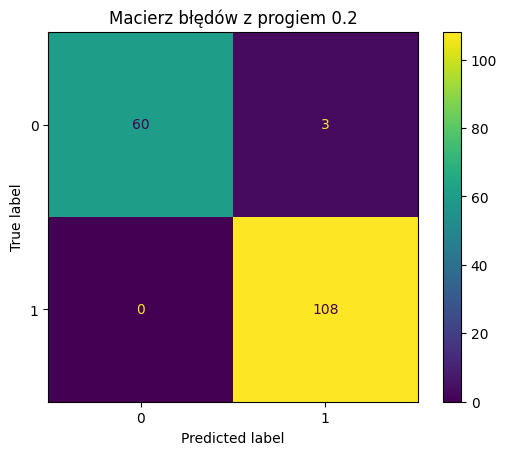

In [13]:
# Set the threshold to 0.2 for classification
threshold = 0.2
y_pred_adjusted = (y_proba >= threshold).astype(int)

# Plotting Confusion Matrix with the adjusted threshold
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_adjusted)
plt.title('Macierz błędów z progiem 0.2')
plt.show()


<Figure size 800x600 with 0 Axes>

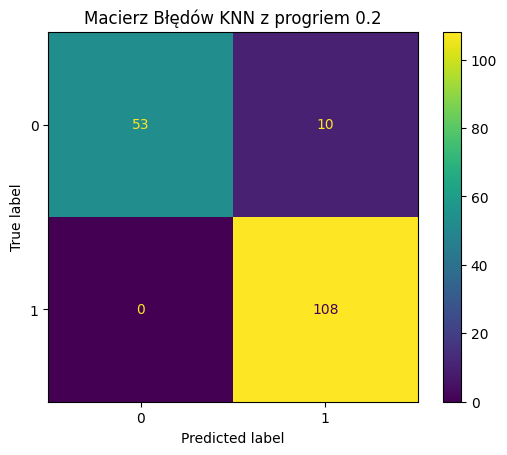

<Figure size 800x600 with 0 Axes>

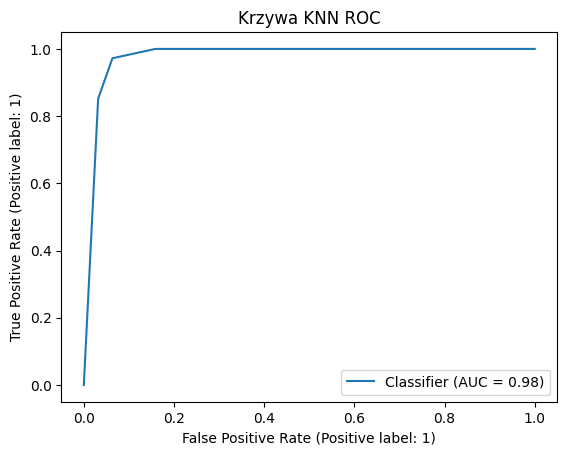

array([[ 53,  10],
       [  0, 108]])

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)

y_proba_knn = knn_clf.predict_proba(X_test)[:, 1]

y_pred_knn_adjusted = (y_proba_knn >= 0.2).astype(int)

conf_mat_knn = confusion_matrix(y_test, y_pred_knn_adjusted)

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn_adjusted)
plt.title('Macierz Błędów KNN z progriem 0.2')
plt.show()

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_proba_knn)

plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test, y_proba_knn)
plt.title('Krzywa KNN ROC')
plt.show()

conf_mat_knn


<Figure size 800x600 with 0 Axes>

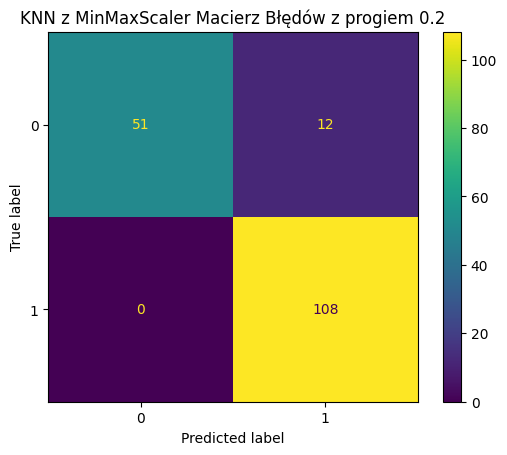

<Figure size 800x600 with 0 Axes>

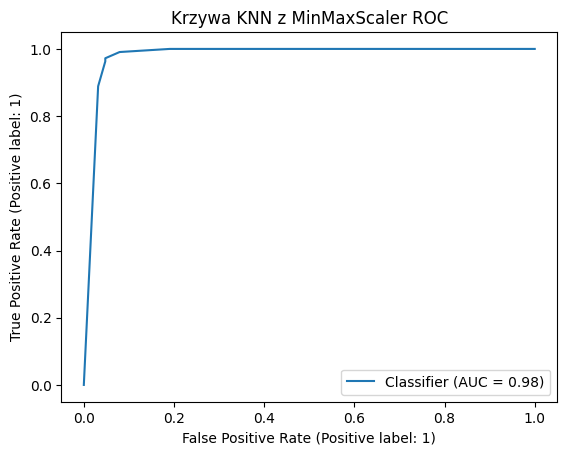

array([[ 51,  12],
       [  0, 108]])

In [18]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

X_mm_scaled = mm_scaler.fit_transform(X)

X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(X_mm_scaled, y, test_size=0.3, random_state=42)

knn_clf_mm = KNeighborsClassifier()
knn_clf_mm.fit(X_train_mm, y_train_mm)

y_proba_knn_mm = knn_clf_mm.predict_proba(X_test_mm)[:, 1]

y_pred_knn_mm_adjusted = (y_proba_knn_mm >= 0.2).astype(int)

conf_mat_knn_mm = confusion_matrix(y_test_mm, y_pred_knn_mm_adjusted)

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test_mm, y_pred_knn_mm_adjusted)
plt.title('KNN z MinMaxScaler Macierz Błędów z progiem 0.2')
plt.show()

fpr_knn_mm, tpr_knn_mm, thresholds_knn_mm = roc_curve(y_test_mm, y_proba_knn_mm)

plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test_mm, y_proba_knn_mm)
plt.title('Krzywa KNN z MinMaxScaler ROC')
plt.show()

conf_mat_knn_mm


Krzywa ROC bardzo szybko zbliża się do jedynki
